# 전처리 된 데이터 가져오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/스마트인재개발원_사물지능_최종_프로젝트/python

/content/drive/MyDrive/스마트인재개발원_사물지능_최종_프로젝트/python


In [ ]:
!pwd

/content/drive/MyDrive/스마트인재개발원_사물지능_최종_프로젝트/python


In [ ]:
import pandas as pd

data = pd.read_csv('solar_final_data2.csv',encoding='cp949')

data.head()

,Unnamed: 0,일시,태양방위각,태양고도각,기온,강수량,풍속,풍향,습도,증기압,이슬점온도,현지기압,일조,일사,미세먼지,발전량(Target)
0,0,2017-01-01 08:00:00,9.1,305.9,0.5,0.0,0.6,70.0,97.0,6.1,0.0,1021.9,0.0,0.07,23.0,0.0
1,1,2017-01-01 09:00:00,18.3,316.5,1.5,0.0,0.3,0.0,94.0,6.4,0.6,1022.4,0.3,0.35,21.0,1.4
2,2,2017-01-01 10:00:00,25.7,329.2,2.8,0.0,0.7,250.0,87.0,6.5,0.8,1022.7,0.2,0.69,27.0,4.3
3,3,2017-01-01 11:00:00,30.6,343.9,4.7,0.0,0.8,270.0,78.0,6.6,1.1,1022.4,0.9,1.28,31.0,9.2
4,4,2017-01-01 12:00:00,32.4,0.0,6.7,0.0,1.0,230.0,68.0,6.7,1.2,1021.5,1.0,1.63,53.0,14.4


In [ ]:
import pandas as pd
import numpy as np

pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)

energy = pd.read_csv("solar_final_data.csv",encoding='cp949')
energy.head()

,Unnamed: 0,일시,태양방위각,태양고도각,기온,강수량,풍속,풍향,습도,증기압,이슬점온도,현지기압,일조,일사,미세먼지,발전량(Target)
0,0,2017-01-01 08:00:00,9.05,305.88,0.50,0.00,0.60,70.00,97.00,6.10,0.00,"1,021.90",0.00,0.07,10.00,0.02
1,1,2017-01-01 09:00:00,18.29,316.52,1.50,0.00,0.30,0.00,94.00,6.40,0.60,"1,022.40",0.30,0.35,10.00,1.43
2,2,2017-01-01 10:00:00,25.72,329.15,2.80,0.00,0.70,250.00,87.00,6.50,0.80,"1,022.70",0.20,0.69,14.00,4.31
3,3,2017-01-01 11:00:00,30.63,343.86,4.70,0.00,0.80,270.00,78.00,6.60,1.10,"1,022.40",0.90,1.28,24.00,9.22
4,4,2017-01-01 12:00:00,32.36,0.00,6.70,0.00,1.00,230.00,68.00,6.70,1.20,"1,021.50",1.00,1.63,14.00,14.42


In [ ]:
energy["일시"] = pd.to_datetime(energy["일시"])
energy.set_index("일시", inplace=True)
energy.drop("Unnamed: 0", axis=1, inplace=True)
energy.head()

,태양방위각,태양고도각,기온,강수량,풍속,풍향,습도,증기압,이슬점온도,현지기압,일조,일사,미세먼지,발전량(Target)
일시,,,,,,,,,,,,,,
2017-01-01 08:00:00,9.05,305.88,0.50,0.00,0.60,70.00,97.00,6.10,0.00,"1,021.90",0.00,0.07,10.00,0.02
2017-01-01 09:00:00,18.29,316.52,1.50,0.00,0.30,0.00,94.00,6.40,0.60,"1,022.40",0.30,0.35,10.00,1.43
2017-01-01 10:00:00,25.72,329.15,2.80,0.00,0.70,250.00,87.00,6.50,0.80,"1,022.70",0.20,0.69,14.00,4.31
2017-01-01 11:00:00,30.63,343.86,4.70,0.00,0.80,270.00,78.00,6.60,1.10,"1,022.40",0.90,1.28,24.00,9.22
2017-01-01 12:00:00,32.36,0.00,6.70,0.00,1.00,230.00,68.00,6.70,1.20,"1,021.50",1.00,1.63,14.00,14.42


In [ ]:
val_start = "2023-06-01 00:00:00"
test_start = "2023-09-01 00:00:00"

train = energy[energy.index < val_start]
valid = energy[(energy.index >= val_start) & (energy.index < test_start)]
test = energy[energy.index >= test_start]

train.shape, valid.shape, test.shape

((27674, 14), (1175, 14), (993, 14))

In [ ]:
energy.columns

Index(['태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
       '일조', '일사', '미세먼지', '발전량(Target)'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# load만 복원하기 위한 스케일링 (먼저 해야함)
y_scaler = MinMaxScaler()
y_scaler.fit_transform(train[['발전량(Target)']])

scaler = MinMaxScaler()

# load와 temp가 각각 크기로 스케일링
train[['태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
       '일조', '일사', '미세먼지', '발전량(Target)']] = scaler.fit_transform(train)
valid[['태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
       '일조', '일사', '미세먼지', '발전량(Target)']] = scaler.transform(valid)
test[['태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
       '일조', '일사', '미세먼지', '발전량(Target)']] = scaler.transform(test)

train.head()

<ipython-input-23-536f2f632e09>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
<ipython-input-23-536f2f632e09>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid[['태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
<ipython-input-23-536f2f632e09>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,태양방위각,태양고도각,기온,강수량,풍속,풍향,습도,증기압,이슬점온도,현지기압,일조,일사,미세먼지,발전량(Target)
일시,,,,,,,,,,,,,,
2017-01-01 08:00:00,0.31,0.89,0.25,0.00,0.07,0.19,0.98,0.15,0.54,0.85,0.00,0.02,0.01,0.00
2017-01-01 09:00:00,0.40,0.92,0.27,0.00,0.03,0.00,0.95,0.16,0.55,0.86,0.30,0.09,0.01,0.03
2017-01-01 10:00:00,0.47,0.96,0.30,0.00,0.08,0.69,0.88,0.16,0.56,0.86,0.20,0.17,0.02,0.09
2017-01-01 11:00:00,0.52,1.00,0.34,0.00,0.09,0.75,0.79,0.16,0.56,0.86,0.90,0.32,0.03,0.18
2017-01-01 12:00:00,0.54,0.00,0.38,0.00,0.11,0.64,0.69,0.16,0.56,0.84,1.00,0.41,0.02,0.29


In [ ]:
energy.columns

Index(['태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
       '일조', '일사', '미세먼지', '발전량(Target)'],
      dtype='object')

In [ ]:
def split_data(data, T) :
  shifted = data.copy()

  # y_t+1 컬럼에 라벨데이터를 저장
  shifted["y_t+1"] = shifted["발전량(Target)"].shift(-1, freq="H")

  shifted_1 = shifted.copy()
  shifted_2 = shifted.copy()
  shifted_3 = shifted.copy()
  shifted_4 = shifted.copy()
  shifted_5 = shifted.copy()
  shifted_6 = shifted.copy()
  shifted_7 = shifted.copy()
  shifted_8 = shifted.copy()
  shifted_9 = shifted.copy()
  shifted_10 = shifted.copy()
  shifted_11 = shifted.copy()
  shifted_12 = shifted.copy()
  shifted_13 = shifted.copy()
  shifted_14 = shifted.copy()


  # load, temp를 각각 이전 5시간 데이터를 특성데이터로 저장 (t-5, t-4, t-3, t-2, t-1, t-0)
  for t in range(1, T+1) :
    shifted_1[["t-{}".format(T-t)]] = shifted[['태양방위각']].shift(T-t, freq="H")
    shifted_2[["t-{}".format(T-t)]] = shifted[['태양고도각']].shift(T-t, freq="H")
    shifted_3[["t-{}".format(T-t)]] = shifted[['기온']].shift(T-t, freq="H")
    shifted_4[["t-{}".format(T-t)]] = shifted[['강수량']].shift(T-t, freq="H")
    shifted_5[["t-{}".format(T-t)]] = shifted[['풍속']].shift(T-t, freq="H")
    shifted_6[["t-{}".format(T-t)]] = shifted[['풍향']].shift(T-t, freq="H")
    shifted_7[["t-{}".format(T-t)]] = shifted[['습도']].shift(T-t, freq="H")
    shifted_8[["t-{}".format(T-t)]] = shifted[['증기압']].shift(T-t, freq="H")
    shifted_9[["t-{}".format(T-t)]] = shifted[['이슬점온도']].shift(T-t, freq="H")
    shifted_10[["t-{}".format(T-t)]] = shifted[['현지기압']].shift(T-t, freq="H")
    shifted_11[["t-{}".format(T-t)]] = shifted[['일조']].shift(T-t, freq="H")
    shifted_12[["t-{}".format(T-t)]] = shifted[['일사']].shift(T-t, freq="H")
    shifted_13[["t-{}".format(T-t)]] = shifted[['미세먼지']].shift(T-t, freq="H")
    shifted_14[["t-{}".format(T-t)]] = shifted[['발전량(Target)']].shift(T-t, freq="H")

  shifted_11 = shifted_1.iloc[:, 15:]
  shifted_22 = shifted_2.iloc[:, 15:]
  shifted_33 = shifted_3.iloc[:, 15:]
  shifted_44 = shifted_4.iloc[:, 15:]
  shifted_55 = shifted_5.iloc[:, 15:]
  shifted_66 = shifted_6.iloc[:, 15:]
  shifted_77 = shifted_7.iloc[:, 15:]
  shifted_88 = shifted_8.iloc[:, 15:]
  shifted_99 = shifted_9.iloc[:, 15:]
  shifted_1010 = shifted_10.iloc[:, 15:]
  shifted_1111 = shifted_11.iloc[:, 15:]
  shifted_1212 = shifted_12.iloc[:, 15:]
  shifted_1313 = shifted_13.iloc[:, 15:]
  shifted_1414 = shifted_14.iloc[:, 15:]

  temp = pd.concat([shifted.iloc[:, -1],shifted_11,shifted_22,shifted_33,shifted_44, shifted_55,
                    shifted_66, shifted_77,shifted_88,shifted_99,shifted_1010,shifted_1111,shifted_1212,shifted_1313,shifted_1414],
                   axis=1,keys=['y','태양방위각', '태양고도각', '기온', '강수량', '풍속', '풍향', '습도', '증기압', '이슬점온도', '현지기압',
                    '일조', '일사', '미세먼지', '발전량(Target)'])
  return temp

In [ ]:
T = 6

train_shifted = split_data(train, T)
train_shifted = train_shifted.dropna(how="any")

train_shifted.head()

y 태양방위각                          태양고도각            ...  \
                    y_t+1   t-5  t-4  t-3  t-2  t-1  t-0   t-5  t-4  t-3  ...   
일시                                                                        ...   
2017-01-01 13:00:00  0.31  0.31 0.40 0.47 0.52 0.54 0.52  0.89 0.92 0.96  ...   
2017-01-01 14:00:00  0.23  0.40 0.47 0.52 0.54 0.52 0.47  0.92 0.96 1.00  ...   
2017-01-01 15:00:00  0.14  0.47 0.52 0.54 0.52 0.47 0.40  0.96 1.00 0.00  ...   
2017-01-01 16:00:00  0.05  0.52 0.54 0.52 0.47 0.40 0.31  1.00 0.00 0.05  ...   
2017-01-01 17:00:00  0.00  0.54 0.52 0.47 0.40 0.31 0.20  0.00 0.05 0.09  ...   

                    미세먼지                발전량(Target)                           
                     t-3  t-2  t-1  t-0         t-5  t-4  t-3  t-2  t-1  t-0  
일시                                                                            
2017-01-01 13:00:00 0.02 0.03 0.02 0.02        0.00 0.03 0.09 0.18 0.29 0.33  
2017-01-01 14:00:00 0.03 0.02 0.02 0.01        0.03 0.09 0.18 0.29 0.33 0.31  
2017-01-01 15:00:00 0.02 0.02 0.01 0.03        0.09 0.18 0.29 0.33 0.31 0.23  
2017-01-01 16:00:00 0.02 0.01 0.03 0.02        0.18 0.29 0.33 0.31 0.23 0.14  
2017-01-01 17:00:00 0.01 0.03 0.02 0.01        0.29 0.33 0.31 0.23 0.14 0.05  

[5 rows x 79 columns]

In [ ]:
valid_shifted = split_data(valid, T)
valid_shifted = valid_shifted.dropna(how="any")

valid_shifted.head()

y 태양방위각                          태양고도각            ...  \
                    y_t+1   t-5  t-4  t-3  t-2  t-1  t-0   t-5  t-4  t-3  ...   
일시                                                                        ...   
2023-06-01 11:00:00  0.18  0.34 0.46 0.58 0.70 0.82 0.93  0.73 0.75 0.78  ...   
2023-06-01 12:00:00  0.17  0.46 0.58 0.70 0.82 0.93 0.99  0.75 0.78 0.80  ...   
2023-06-01 13:00:00  0.12  0.58 0.70 0.82 0.93 0.99 0.93  0.78 0.80 0.84  ...   
2023-06-01 14:00:00  0.19  0.70 0.82 0.93 0.99 0.93 0.82  0.80 0.84 0.90  ...   
2023-06-01 15:00:00  0.16  0.82 0.93 0.99 0.93 0.82 0.70  0.84 0.90 0.00  ...   

                    미세먼지                발전량(Target)                           
                     t-3  t-2  t-1  t-0         t-5  t-4  t-3  t-2  t-1  t-0  
일시                                                                            
2023-06-01 11:00:00 0.01 0.02 0.02 0.03        0.00 0.02 0.05 0.07 0.32 0.15  
2023-06-01 12:00:00 0.02 0.02 0.03 0.04        0.02 0.05 0.07 0.32 0.15 0.18  
2023-06-01 13:00:00 0.02 0.03 0.04 0.04        0.05 0.07 0.32 0.15 0.18 0.17  
2023-06-01 14:00:00 0.03 0.04 0.04 0.03        0.07 0.32 0.15 0.18 0.17 0.12  
2023-06-01 15:00:00 0.04 0.04 0.03 0.03        0.32 0.15 0.18 0.17 0.12 0.19  

[5 rows x 79 columns]

In [ ]:
test_shifted = split_data(test, T)
test_shifted = test_shifted.dropna(how="any")

test_shifted.head()

y 태양방위각                          태양고도각            ...  \
                    y_t+1   t-5  t-4  t-3  t-2  t-1  t-0   t-5  t-4  t-3  ...   
일시                                                                        ...   
2023-09-01 12:00:00  0.70  0.39 0.51 0.63 0.73 0.81 0.85  0.79 0.82 0.85  ...   
2023-09-01 13:00:00  0.74  0.51 0.63 0.73 0.81 0.85 0.81  0.82 0.85 0.89  ...   
2023-09-01 14:00:00  0.67  0.63 0.73 0.81 0.85 0.81 0.73  0.85 0.89 0.96  ...   
2023-09-01 15:00:00  0.62  0.73 0.81 0.85 0.81 0.73 0.63  0.89 0.96 0.00  ...   
2023-09-01 16:00:00  0.51  0.81 0.85 0.81 0.73 0.63 0.51  0.96 0.00 0.09  ...   

                    미세먼지                발전량(Target)                           
                     t-3  t-2  t-1  t-0         t-5  t-4  t-3  t-2  t-1  t-0  
일시                                                                            
2023-09-01 12:00:00 0.03 0.03 0.02 0.02        0.01 0.09 0.17 0.29 0.51 0.61  
2023-09-01 13:00:00 0.03 0.02 0.02 0.02        0.09 0.17 0.29 0.51 0.61 0.70  
2023-09-01 14:00:00 0.02 0.02 0.02 0.02        0.17 0.29 0.51 0.61 0.70 0.74  
2023-09-01 15:00:00 0.02 0.02 0.02 0.02        0.29 0.51 0.61 0.70 0.74 0.67  
2023-09-01 16:00:00 0.02 0.02 0.02 0.02        0.51 0.61 0.70 0.74 0.67 0.62  

[5 rows x 79 columns]

In [ ]:
y_train = train_shifted.iloc[:, 0]
X_train = train_shifted.iloc[:, 1:]

y_valid = valid_shifted.iloc[:, 0]
X_valid = valid_shifted.iloc[:, 1:]

y_test = test_shifted.iloc[:, 0]
X_test = test_shifted.iloc[:, 1:]

y_train.shape, X_train.shape, y_valid.shape, X_valid.shape, y_test.shape, X_test.shape

((13219,), (13219, 78), (566,), (566, 78), (421,), (421, 78))

In [ ]:
X_train = np.array(X_train).reshape(-1, 13, 6)
y_train = np.array(y_train).reshape(-1, 1)
X_valid = np.array(X_valid).reshape(-1, 13, 6)
y_valid = np.array(y_valid).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 13, 6)
y_test = np.array(y_test).reshape(-1, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.callbacks import EarlyStopping, ModelCheckpoint

model4 = Sequential()
model4.add(GRU(5, activation="tanh", return_sequences=True,
               input_shape=(13,6)))
model4.add(GRU(4, activation="tanh"))
model4.add(Dense(1))

model4.compile(loss="mse", optimizer="adam")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
et = EarlyStopping(monitor="loss", mode="min", patience=10)
mc = ModelCheckpoint("./model/lstm3_model_{epoch:02d}_{loss:.3f}_{val_loss:.3f}.keras",
                     monitor="loss", mode="min",
                     save_best_only=True)

h4 = model4.fit(X_train, y_train, epochs=100, batch_size=16,
                validation_data=(X_valid, y_valid),
                callbacks=[et, mc])

Epoch 1/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0443 - val_loss: 0.0129
Epoch 2/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0060 - val_loss: 0.0112
Epoch 3/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0042 - val_loss: 0.0080
Epoch 4/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0036 - val_loss: 0.0058
Epoch 5/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 0.0033 - val_loss: 0.0063
Epoch 6/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 7/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0032 - val_loss: 0.0059
Epoch 8/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0031 - val_loss: 0.0056
Epoch 9/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0030 - val_loss: 0.0054
Epoch 10/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0031 - val_loss: 0.0053
Epoch 11/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0029 - val_loss: 0.0054
Epoch 12/100
827/827 ━━━━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

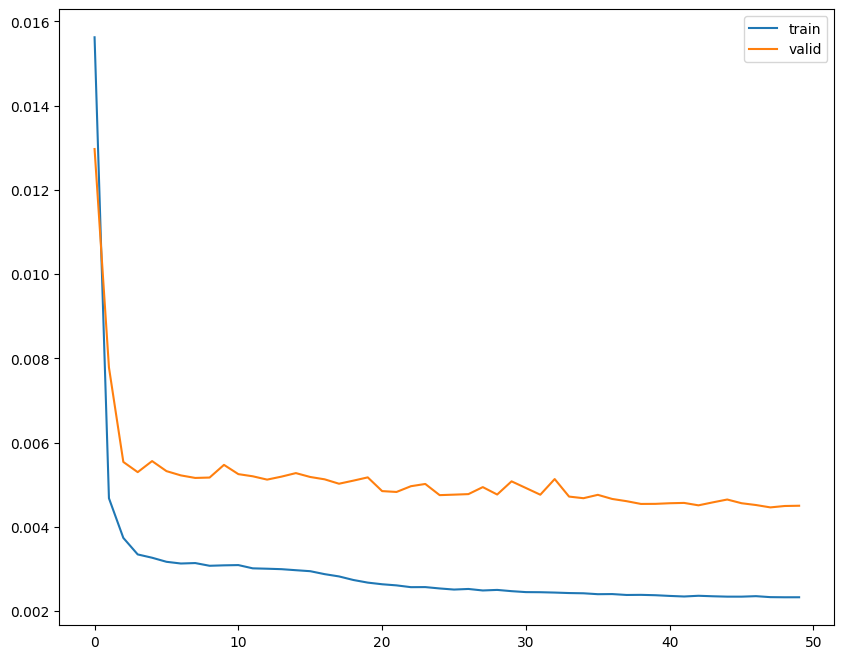

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.plot(h4.history["loss"], label="train")
plt.plot(h4.history["val_loss"], label="valid")
plt.legend()
plt.show()

In [ ]:
model4.load_weights("./model/lstm3_model_49_0.002_0.004.keras")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-7-86a75a447adb>", line 1, in <cell line: 1>
    model4.load_weights("./model/lstm3_model_49_0.002_0.004.keras")
NameError: name 'model4' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib

In [ ]:
pred = model4.predict(X_test)

pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[6.04e-01],
       [6.74e-01],
       [6.83e-01],
       [5.69e-01],
       [4.49e-01],
       [2.94e-01],
       [1.22e-01],
       [3.84e-01],
       [4.00e-01],
       [3.69e-01],
       [5.10e-01],
       [1.68e-01],
       [1.23e-01],
       [6.67e-01],
       [6.98e-01],
       [4.23e-01],
       [4.74e-01],
       [2.50e-01],
       [2.10e-01],
       [9.01e-02],
       [7.04e-01],
       [6.91e-01],
       [7.12e-01],
       [5.68e-01],
       [4.24e-01],
       [2.42e-01],
       [9.89e-02],
       [7.05e-01],
       [5.98e-01],
       [6.90e-01],
       [6.13e-01],
       [2.82e-01],
       [1.99e-01],
       [8.26e-01],
       [7.42e-01],
       [7.07e-01],
       [6.27e-01],
       [4.37e-01],
       [8.93e-01],
       [8.98e-01],
       [8.40e-01],
       [6.95e-01],
       [4.64e-01],
       [2.58e-01],
       [1.07e-01],
       [8.72e-01],
       [8.90e-01],
       [8.36e-01],
       [6.87e-01],
       [4.72e-01],
       [2.69e-01],
       [1.04e-01],
       [8.44

In [ ]:
eval_df = pd.DataFrame(pred, columns=["pred_t+1"])
eval_df['timestamp'] = test_shifted.index

eval_df = eval_df[['timestamp', "pred_t+1"]]

# y_test 추가
eval_df["actual"] = np.transpose(y_test).ravel()

eval_df.head()

,timestamp,pred_t+1,actual
0,2023-09-01 12:00:00,0.60,0.70
1,2023-09-01 13:00:00,0.67,0.74
2,2023-09-01 14:00:00,0.68,0.67
3,2023-09-01 15:00:00,0.57,0.62
4,2023-09-01 16:00:00,0.45,0.51


In [ ]:
# 스케일링 헤제

# 역스케일링
eval_df[['pred_t+1']] = y_scaler.inverse_transform(eval_df[['pred_t+1']])
eval_df[['actual']] = y_scaler.inverse_transform(eval_df[['actual']])

eval_df.head()

,timestamp,pred_t+1,actual
0,2023-09-01 12:00:00,30.12,34.67
1,2023-09-01 13:00:00,33.61,36.73
2,2023-09-01 14:00:00,34.05,33.30
3,2023-09-01 15:00:00,28.38,30.84
4,2023-09-01 16:00:00,22.41,25.33


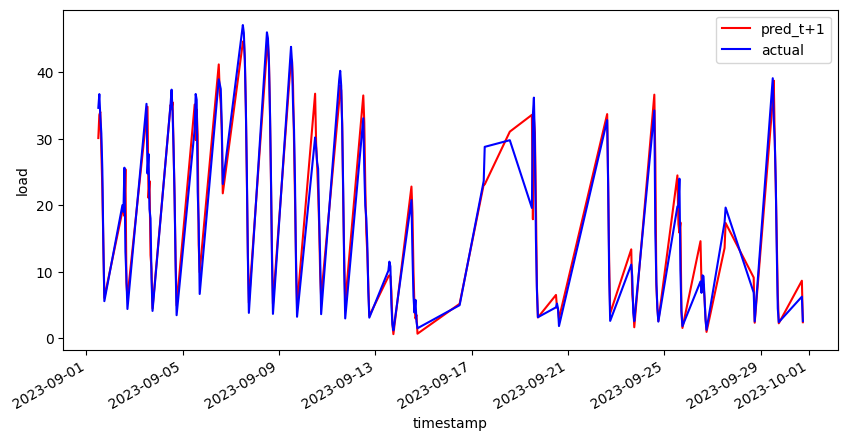

In [ ]:
eval_df[eval_df["timestamp"]<'2023-10'].plot(x='timestamp',
                                             y=['pred_t+1', 'actual'],
                                             style=['r', 'b'], figsize=(10, 5))
plt.xlabel('timestamp', fontsize=10)
plt.ylabel('load', fontsize=10)
plt.show()

In [ ]:
eval_df

eval_df['pred_t+1'] = round(eval_df['pred_t+1'], 2)
eval_df['actual'] = round(eval_df['actual'], 2)

eval_df

,timestamp,pred_t+1,actual
0,2023-09-01 12:00:00,30.12,34.67
1,2023-09-01 13:00:00,33.61,36.73
2,2023-09-01 14:00:00,34.05,33.30
3,2023-09-01 15:00:00,28.38,30.84
4,2023-09-01 16:00:00,22.41,25.33
...,...,...,...
416,2023-11-29 17:00:00,0.97,1.06
417,2023-11-30 13:00:00,34.16,34.82
418,2023-11-30 14:00:00,29.76,26.06
419,2023-11-30 15:00:00,16.64,11.79


In [ ]:
eval_df.to_csv('solar_actual_pred_data2.csv', encoding='cp949')